In [142]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [143]:
#set the file extension for images to be saved as
file_ext = 'pdf'  #'pdf'

In [144]:
# Read in data as .csv files

#ppo
ppo_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/training_log_SpaceInvaders.csv", header= None, index_col= None, names= ["Steps", "Score", "Duration"])

#dqn
dqn_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/dqn_training.csv", header= None, index_col= None, names= ["Episodes", "Score"])
dqn_eval = pd.read_csv(filepath_or_buffer= os.getcwd() + "/dqn_eval.csv", header= None, index_col= None, names= ["Episodes", "Score"])

#rand
rand_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/training_log_SpaceInvaders_rand.csv", header= None, index_col= None, names= ["Steps", "Score", "Duration"])

#GA
ga_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/fitness_history.csv", header= None, index_col= None, names= ["Best", "Average"], sep=' ')
ga_np = ga_log.to_numpy()

In [145]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(ppo_log) - 1):
    if((ppo_log.iloc[(i + 1),0] - ppo_log.iloc[i,0]) < 0):
        diff = ppo_log.iloc[i,0]

    ppo_log.iloc[i,0] += addition
    addition += diff
    diff = 0
ppo_log.iloc[(len(ppo_log) - 1),0] += addition

ppo_np = ppo_log.to_numpy()

In [146]:
# Calculate the rolling average in blocks of 50 for ppo

chunks = np.array_split(ppo_np, 50)
ppo_chunked = np.zeros((5, len(chunks)))


for i in range(len(chunks)):
    ppo_chunked[:,i] = np.append(chunks[i][-1,0], np.append(np.mean(chunks[i][:,1:], 0), np.std(chunks[i][:,1:], 0)) )
ppo_chunked = np.transpose(ppo_chunked)    

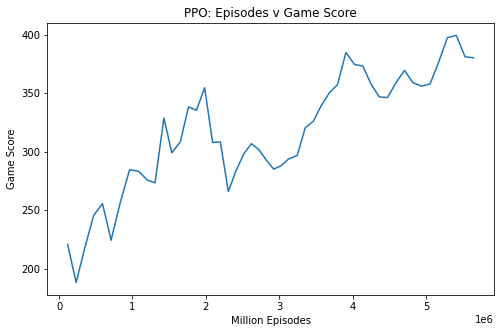

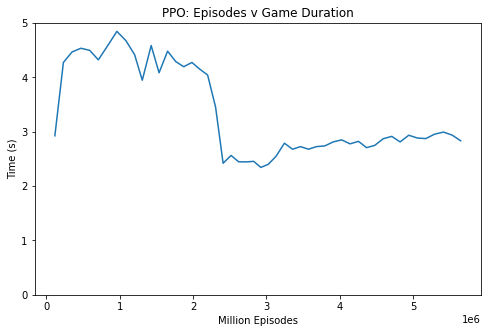

In [147]:
# Plotting the Score for ppo

fig1, ax1 = plt.subplots(1, figsize = (8,5))
ax1.errorbar(ppo_chunked[:,0], ppo_chunked[:,1], xerr=0, yerr=0, fmt='-')#
#ax1.set_ylim([0, 450])

ax1.set_xlabel('Million Episodes')
ax1.set_ylabel('Game Score')
ax1.set_title('PPO: Episodes v Game Score')

fig1.savefig('images/{0}.{1}'.format('ppo_full_score',file_ext))

fig2, ax2 = plt.subplots(1, figsize = (8,5))
plt.plot(ppo_chunked[:,0], ppo_chunked[:,2])

ax2.set_ylim([0, 5])
ax2.set_xlabel('Million Episodes')
ax2.set_ylabel('Time (s)')
ax2.set_title('PPO: Episodes v Game Duration')

fig2.savefig('images/{0}.{1}'.format('ppo_full_dur',file_ext))

plt.show()

In [148]:
ppo_cut = ppo_np[:3400, :]
num_chunks = 67

chunks = np.array_split(ppo_cut, num_chunks)
ppo_cut_chunked = np.zeros((3, len(chunks)))

#ppo in 50 segments
for i in range(len(chunks)):
    ppo_cut_chunked[:,i] = np.append(chunks[i][-1,0], np.mean(chunks[i][:,1:], 0) )
ppo_cut_chunked = np.transpose(ppo_cut_chunked)    

#rand in 50 segments
rand_numpy = rand_log.to_numpy()
rand_chunks = np.array_split(rand_numpy, num_chunks)
rand_chunked = np.zeros((3, len(chunks)))

for i in range(len(chunks)):
    rand_chunked[:,i] = np.append(rand_chunks[i][-1,0], np.mean(rand_chunks[i][:,1:], 0) )
rand_chunked = np.transpose(rand_chunked)   


#dqn is already in chunks
dqn_numpy = dqn_log.to_numpy()


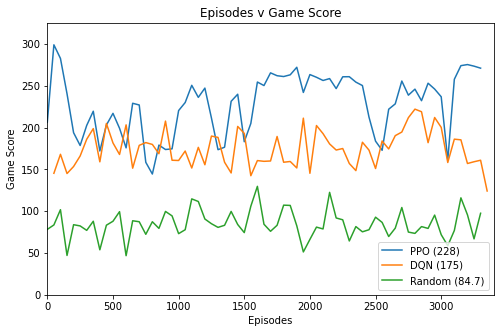

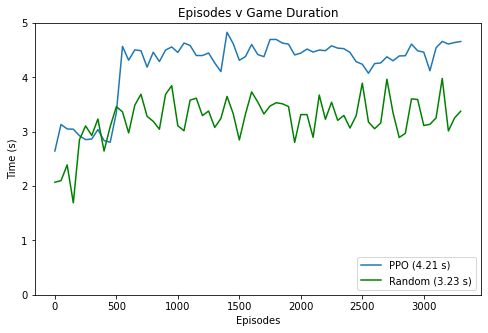

In [149]:
# Plotting score against number of episodes

fig3, ax3 = plt.subplots(1, figsize = (8,5))

plt.plot(np.arange(0,3350,50), ppo_cut_chunked[:,1], label = 'PPO ({0:.3g})'.format(np.mean(ppo_cut_chunked[:,1])))
plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = 'DQN ({0:.3g})'.format(np.mean(dqn_numpy[:,1])))
plt.plot(np.arange(0,3350,50), rand_chunked[:,1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])))


ax3.set_ylim([0, 325])
ax3.set_xlim([0, 3400])
ax3.set_xlabel('Episodes')
ax3.set_ylabel('Game Score')
ax3.set_title('Episodes v Game Score')

plt.legend(loc='lower right')
plt.show()

fig3.savefig('images/{0}.{1}'.format('comp_score',file_ext))


# Plotting score against number of episodes

fig4, ax4 = plt.subplots(1, figsize = (8,5))

plt.plot(np.arange(0,3350,50), ppo_cut_chunked[:,2], label= 'PPO ({0:.3g} s)'.format(np.mean(ppo_cut_chunked[:,2])))
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")
plt.plot(np.arange(0,3350,50), rand_chunked[:,2], label = 'Random ({0:.3g} s)'.format(np.mean(rand_chunked[:,2])), color='g')
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")

ax4.set_ylim([0, 5])
#ax3.set_xlim([0, 3400])
ax4.set_xlabel('Episodes')
ax4.set_ylabel('Time (s)')
ax4.set_title('Episodes v Game Duration')

plt.legend(loc='lower right')
plt.show()

fig4.savefig('images/{0}.{1}'.format('comp_duration',file_ext))

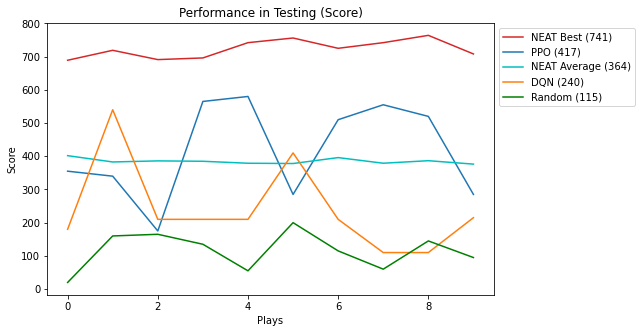

In [150]:
ppo_np[-10:,1]
# Plotting the performance in evaluaiton

fig5, ax5 = plt.subplots(1, figsize = (8,5))

plt.plot(ga_np[-10:,0], label='NEAT Best ({0:.3g})'.format(np.mean(ga_np[:,0])), color='tab:red')
plt.plot(ppo_np[-10:,1], label= 'PPO ({0:.3g})'.format(np.mean(ppo_np[-10:,1])), color='tab:blue')
plt.plot(ga_np[-10:,1], label='NEAT Average ({0:.3g})'.format(np.mean(ga_np[:,1])), color='c')

plt.plot(dqn_eval.to_numpy()[:,1], label= 'DQN ({0:.3g})'.format(np.mean(dqn_eval.to_numpy()[:,1])), color='tab:orange')
plt.plot(rand_numpy[-10:,1], label= 'Random ({0:.3g})'.format(np.mean(rand_numpy[-10:,1])), color='g')

#Neat

#plt.plot(np.arange(0,3350,50), rand_chunked[:,2], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,2])))
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")


#ax3.set_xlim([0, 3400])
ax5.set_xlabel('Plays')
ax5.set_ylabel('Score')
ax5.set_title('Performance in Testing (Score)')

#ax5.set_ylim([0, 1200])
#ax5.set_xlim([0, 12])

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

fig5.savefig('images/{0}.{1}'.format('eval_score',file_ext))

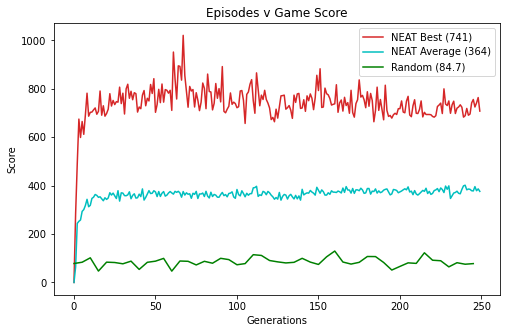

In [151]:
fig6, ax6 = plt.subplots(1, figsize = (8,5))

plt.plot(ga_np[:,0], label='NEAT Best ({0:.3g})'.format(np.mean(ga_np[:,0])), color='tab:red')
plt.plot(ga_np[:,1], label='NEAT Average ({0:.3g})'.format(np.mean(ga_np[:,1])), color='c')
#plt.plot(np.arange(0,len(ga_np)), rand_numpy[:len(ga_np),1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])))
plt.plot(np.arange(0,len(ga_np),5), rand_chunked[:int(len(ga_np)/5),1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])), color='g')

ax6.set_xlabel('Generations')
ax6.set_ylabel('Score')
ax6.set_title('Episodes v Game Score')

plt.legend(loc='upper right')
plt.show()

fig5.savefig('images/{0}.{1}'.format('ga_training_log',file_ext))